# DataSet Information

The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows and temperatures while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied.

# Attribute Information:

The data set contains raw process sensor data (i.e. without feature extraction) which are structured as matrices (tab-delimited) with the rows representing the cycles and the columns the data points within a cycle. The sensors involved are:
Sensor Physical quantity Unit Sampling rate
PS1 Pressure bar 100 Hz
PS2 Pressure bar 100 Hz
PS3 Pressure bar 100 Hz
PS4 Pressure bar 100 Hz
PS5 Pressure bar 100 Hz
PS6 Pressure bar 100 Hz
EPS1 Motor power W 100 Hz
FS1 Volume flow l/min 10 Hz
FS2 Volume flow l/min 10 Hz
TS1 Temperature Â°C 1 Hz
TS2 Temperature Â°C 1 Hz
TS3 Temperature Â°C 1 Hz
TS4 Temperature Â°C 1 Hz
VS1 Vibration mm/s 1 Hz
CE Cooling efficiency (virtual) % 1 Hz
CP Cooling power (virtual) kW 1 Hz
SE Efficiency factor % 1 Hz

The target condition values are cycle-wise annotated in â€˜profile.txtâ€˜ (tab-delimited). As before, the row number represents the cycle number. The columns are

1: Cooler condition / %:
3: close to total failure
20: reduced effifiency
100: full efficiency

2: Valve condition / %:
100: optimal switching behavior
90: small lag
80: severe lag
73: close to total failure

3: Internal pump leakage:
0: no leakage
1: weak leakage
2: severe leakage

4: Hydraulic accumulator / bar:
130: optimal pressure
115: slightly reduced pressure
100: severely reduced pressure
90: close to total failure

5: stable flag:
0: conditions were stable
1: static conditions might not have been reached yet

# Relevant Papers:

[1] Nikolai Helwig, Eliseo Pignanelli, Andreas SchÃ¼tze, â€˜Condition Monitoring of a Complex Hydraulic System Using Multivariate Statisticsâ€™, in Proc. I2MTC-2015 - 2015 IEEE International Instrumentation and Measurement Technology Conference, paper PPS1-39, Pisa, Italy, May 11-14, 2015, doi: 10.1109/I2MTC.2015.7151267.
[2] N. Helwig, A. SchÃ¼tze, â€˜Detecting and compensating sensor faults in a hydraulic condition monitoring systemâ€™, in Proc. SENSOR 2015 - 17th International Conference on Sensors and Measurement Technology, oral presentation D8.1, Nuremberg, Germany, May 19-21, 2015, doi: 10.5162/sensor2015/D8.1.
[3] Tizian Schneider, Nikolai Helwig, Andreas SchÃ¼tze, â€˜Automatic feature extraction and selection for classification of cyclical time series dataâ€™, tm - Technisches Messen (2017), 84(3), 198â€“206, doi: 10.1515/teme-2016-0072.






In [1]:
#lets import some basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import seaborn as sns


In [2]:
#Creating a functin that takes a text file and converts it into a DataFrame.
def Get_data(Text_file):
    #Using the numpy function to convert text file to an array using space as the seperator.
    text_to_file=np.loadtxt(Text_file, delimiter="\t") 
    #Converting the array to DataFrame for better usage.
    text_to_file=pd.DataFrame(text_to_file)
    return text_to_file

We have been provided with several attribute files.
We have:

1: Six Pressure Files.

2: Two Volume Files.

3: Four Temperature Files.

4: Files of Pump Efficiency, Vibrations, Cooling Efficiency, Cooling Power, and Efficiency Factor.

Lets import all the files.

In [3]:
#Importing all the Pressure Files.
Pressure_File_1=Get_data("PS1.txt")
Pressure_File_2=Get_data("PS2.txt")
Pressure_File_3=Get_data("PS3.txt")
Pressure_File_4=Get_data("PS4.txt")
Pressure_File_5=Get_data("PS5.txt")
Pressure_File_6=Get_data("PS6.txt")

In [4]:
#Importing all the Volume Flow Files.
Volume_File_1=Get_data("FS1.txt")
Volume_File_2=Get_data("FS2.txt")

In [5]:
#Importing all the temperature files.
Temperature_File_1=Get_data("TS1.txt")
Temperature_File_2=Get_data("TS2.txt")
Temperature_File_3=Get_data("TS3.txt")
Temperature_File_4=Get_data("TS4.txt")

In [6]:
#Importing cooling files.
Cooling_Efficiency=Get_data("CE.txt")
Cooling_Power=Get_data("CP.txt")

In [7]:
#Importing the rest of the files.
Pump_efficiency=Get_data("EPS1.txt")
Vibration=Get_data("VS1.txt")
Efficiency_Factor=Get_data("SE.txt")


In [8]:
#Importing the Data Label.
Labels=Get_data("profile.txt")

In [9]:
Labels

,0,1,2,3,4
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...
2200,100.0,100.0,0.0,90.0,0.0
2201,100.0,100.0,0.0,90.0,0.0
2202,100.0,100.0,0.0,90.0,0.0
2203,100.0,100.0,0.0,90.0,0.0


We have been provided with the labels. They are:

1: Cooler_Condition

2: Valve_Condition

3: Pump_leak 

4: Hydraulic accumulator / bar

5: Stable_Flag

In [10]:
#Segregating into provided Labels.
Cooler_Condition=pd.DataFrame(Labels.iloc[:,0])
Valve_Condition=pd.DataFrame(Labels.iloc[:,1])
Pump_leak =pd.DataFrame(Labels.iloc[:,2])
Hydraulic_accumulatorn=pd.DataFrame(Labels.iloc[:,3])
Stable_Flag=pd.DataFrame(Labels.iloc[:,4])

In [11]:
#Since we have been provided with data having several input cycles, we must take the mean.
def Mean(DataFrame):
    DataFrame=DataFrame.mean(axis=1)
    return DataFrame

In [12]:
#Converting all the data their respective mean.
Pressure_1=Mean(Pressure_File_1)
Pressure_2=Mean(Pressure_File_2)
Pressure_3=Mean(Pressure_File_3)
Pressure_4=Mean(Pressure_File_4)
Pressure_5=Mean(Pressure_File_5)
Pressure_6=Mean(Pressure_File_6)

#Temperature Data
Temperature_1=Mean(Temperature_File_1)
Temperature_2=Mean(Temperature_File_2)
Temperature_3=Mean(Temperature_File_3)
Temperature_4=Mean(Temperature_File_4)

#Volume Data
Volume_1=Mean(Volume_File_1)
Volume_2=Mean(Volume_File_2)

#Cooling Data
Cooling_Power=Mean(Cooling_Power)
Cooling_Efficiency=Mean(Cooling_Efficiency)

#Other Data
Pump_efficiency=Mean(Pump_efficiency)
Vibration=Mean(Vibration)
Efficiency_Factor=Mean(Efficiency_Factor)

In [13]:
#Merging all the data into a DataFrame.
Data=pd.DataFrame()


#Pressure Data
Data['P1']=Pressure_1
Data['P2']=Pressure_2
Data['P3']=Pressure_3
Data['P4']=Pressure_4
Data['P5']=Pressure_5
Data['P6']=Pressure_6

#Temperature Data

Data['T1']=Temperature_1
Data['T2']=Temperature_2
Data['T3']=Temperature_3
Data['T4']=Temperature_4

#Volume Data

Data['V1']=Volume_1
Data['V2']=Volume_2

#Cooling Data.

Data['CP']=Cooling_Power
Data['CE']=Cooling_Efficiency

#Other Data
Data['PE']=Pump_efficiency

#Prediction Data
Data['PL']=Pump_leak
Data['CD']=Cooler_Condition
Data['VC']=Valve_Condition
Data['HA']=Hydraulic_accumulatorn
Data['Stable']=Stable_Flag




1: Cooler_Condition

2: Valve_Condition

3: Pump_leak 

4: Hydraulic accumulator / bar

5: Stable_Flag

In [14]:
Data.head()

,P1,P2,P3,P4,P5,P6,T1,T2,T3,T4,V1,V2,CP,CE,PE,PL,CD,VC,HA,Stable
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,35.621983,40.978767,38.471017,31.745250,6.709815,10.304592,1.862750,39.601350,2538.929167,0.0,3.0,100.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,36.676967,41.532767,38.978967,34.493867,6.715315,10.403098,1.255550,25.786433,2531.498900,0.0,3.0,100.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,37.880800,42.442450,39.631950,35.646150,6.718522,10.366250,1.113217,22.218233,2519.928000,0.0,3.0,100.0,130.0,1.0
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,38.879050,43.403983,40.403383,36.579467,6.720565,10.302678,1.062150,20.459817,2511.541633,0.0,3.0,100.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,39.803917,44.332750,41.310550,37.427900,6.690308,10.237750,1.070467,19.787017,2503.449500,0.0,3.0,100.0,130.0,1.0


In [15]:
#Now that we have converted the text files into a DataFrame, lets perform some EDA.

In [16]:
Data.describe()

,P1,P2,P3,P4,P5,P6,T1,T2,T3,T4,V1,V2,CP,CE,PE,PL,CD,VC,HA,Stable
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,45.424567,50.365979,47.662121,40.735654,6.198549,9.649453,1.808399,31.299077,2495.509203,0.669388,41.240816,90.693878,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,7.991933,7.396254,7.451888,8.107878,1.032883,0.449246,0.278263,11.575330,73.836682,0.817233,42.383143,10.681802,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,35.313783,40.859400,38.245733,30.390800,2.018572,8.857513,1.062150,17.555983,2361.747267,0.000000,3.000000,73.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,36.237150,41.864183,39.123183,31.272567,6.391670,9.203397,1.550100,20.084650,2442.933467,0.000000,3.000000,80.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,44.836650,49.780583,47.070250,40.429050,6.576673,9.692270,1.739683,27.392533,2480.926633,0.000000,20.000000,100.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,54.104317,58.584467,55.694433,49.409500,6.657508,10.155008,2.148483,46.677383,2548.211467,1.000000,100.000000,100.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,57.899283,61.958467,59.423167,53.060417,6.722707,10.403098,2.840100,47.903667,2740.641000,2.000000,100.000000,100.000000,130.000000,1.000000


In [17]:
#Lets Check the number of Null Values.
Data.isnull().sum()

P1        0
P2        0
P3        0
P4        0
P5        0
P6        0
T1        0
T2        0
T3        0
T4        0
V1        0
V2        0
CP        0
CE        0
PE        0
PL        0
CD        0
VC        0
HA        0
Stable    0
dtype: int64

In [18]:
Data.shape

(2205, 20)

In [19]:
Data.iplot(kind="box")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92705657c0>,
      dtype=object)

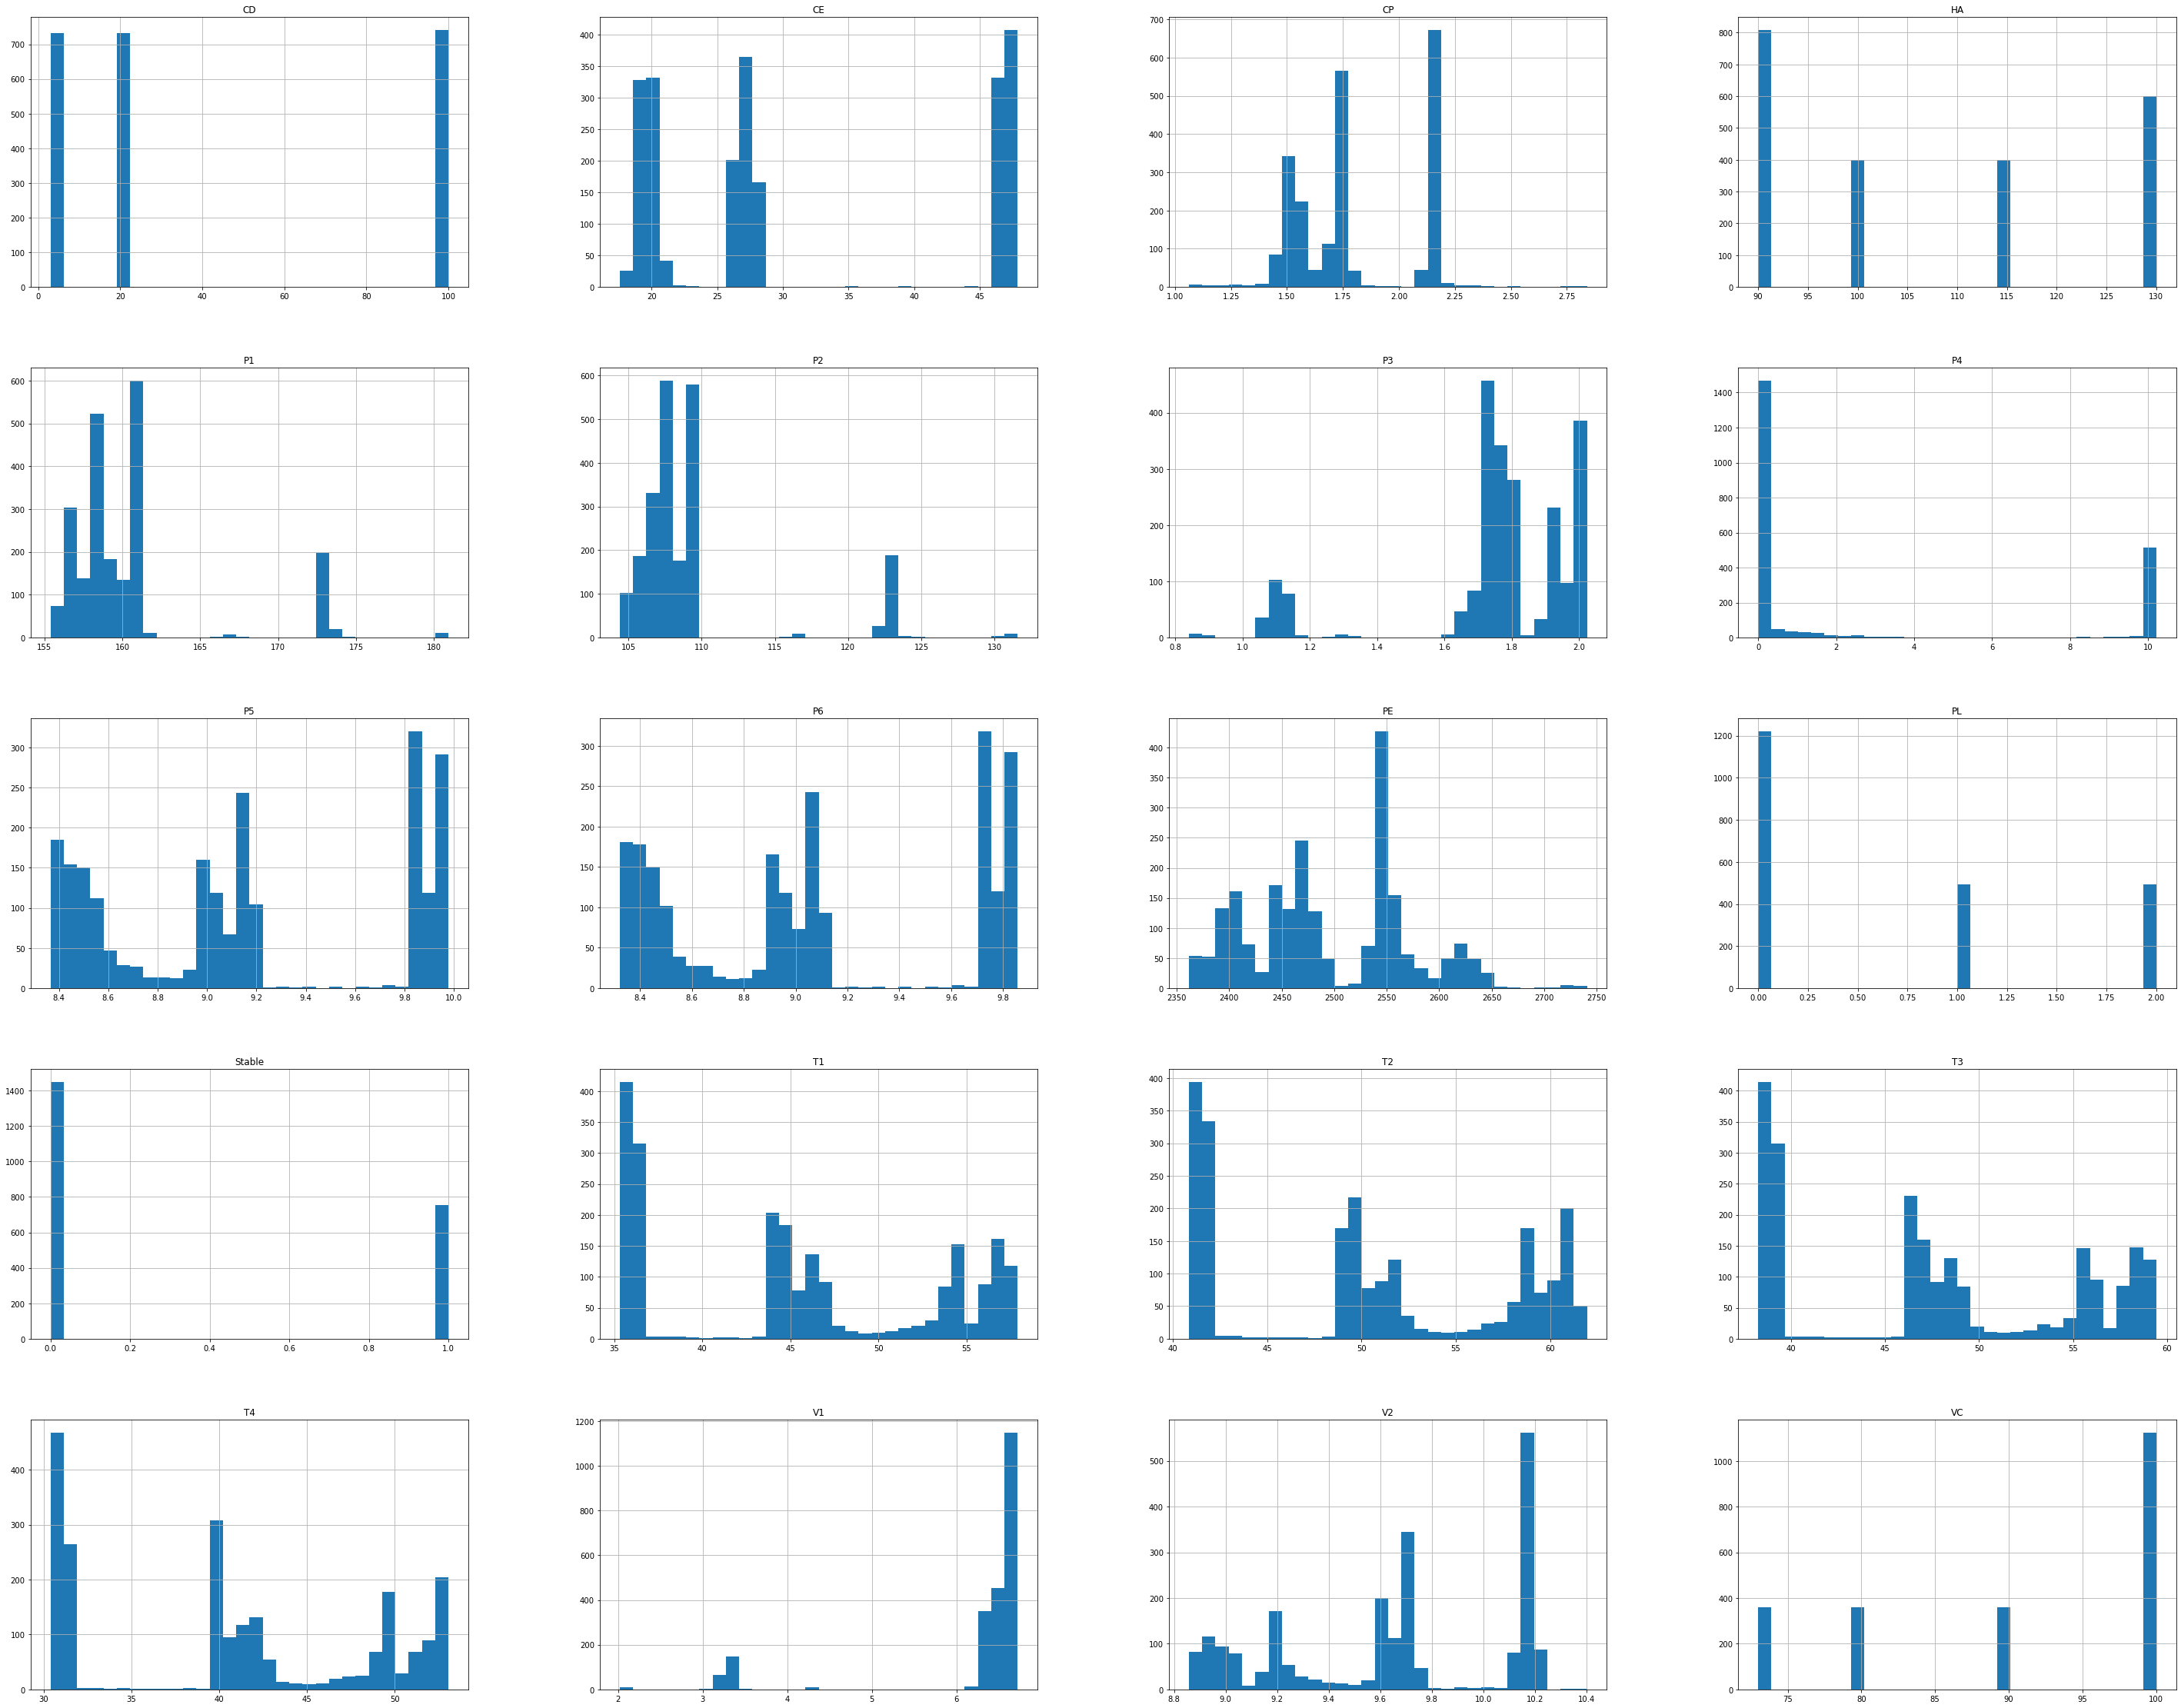

In [20]:
Data.hist(bins=30, figsize=(50, 40))


As we can infer from the plots above, none of the data follows Guassian Distribution.

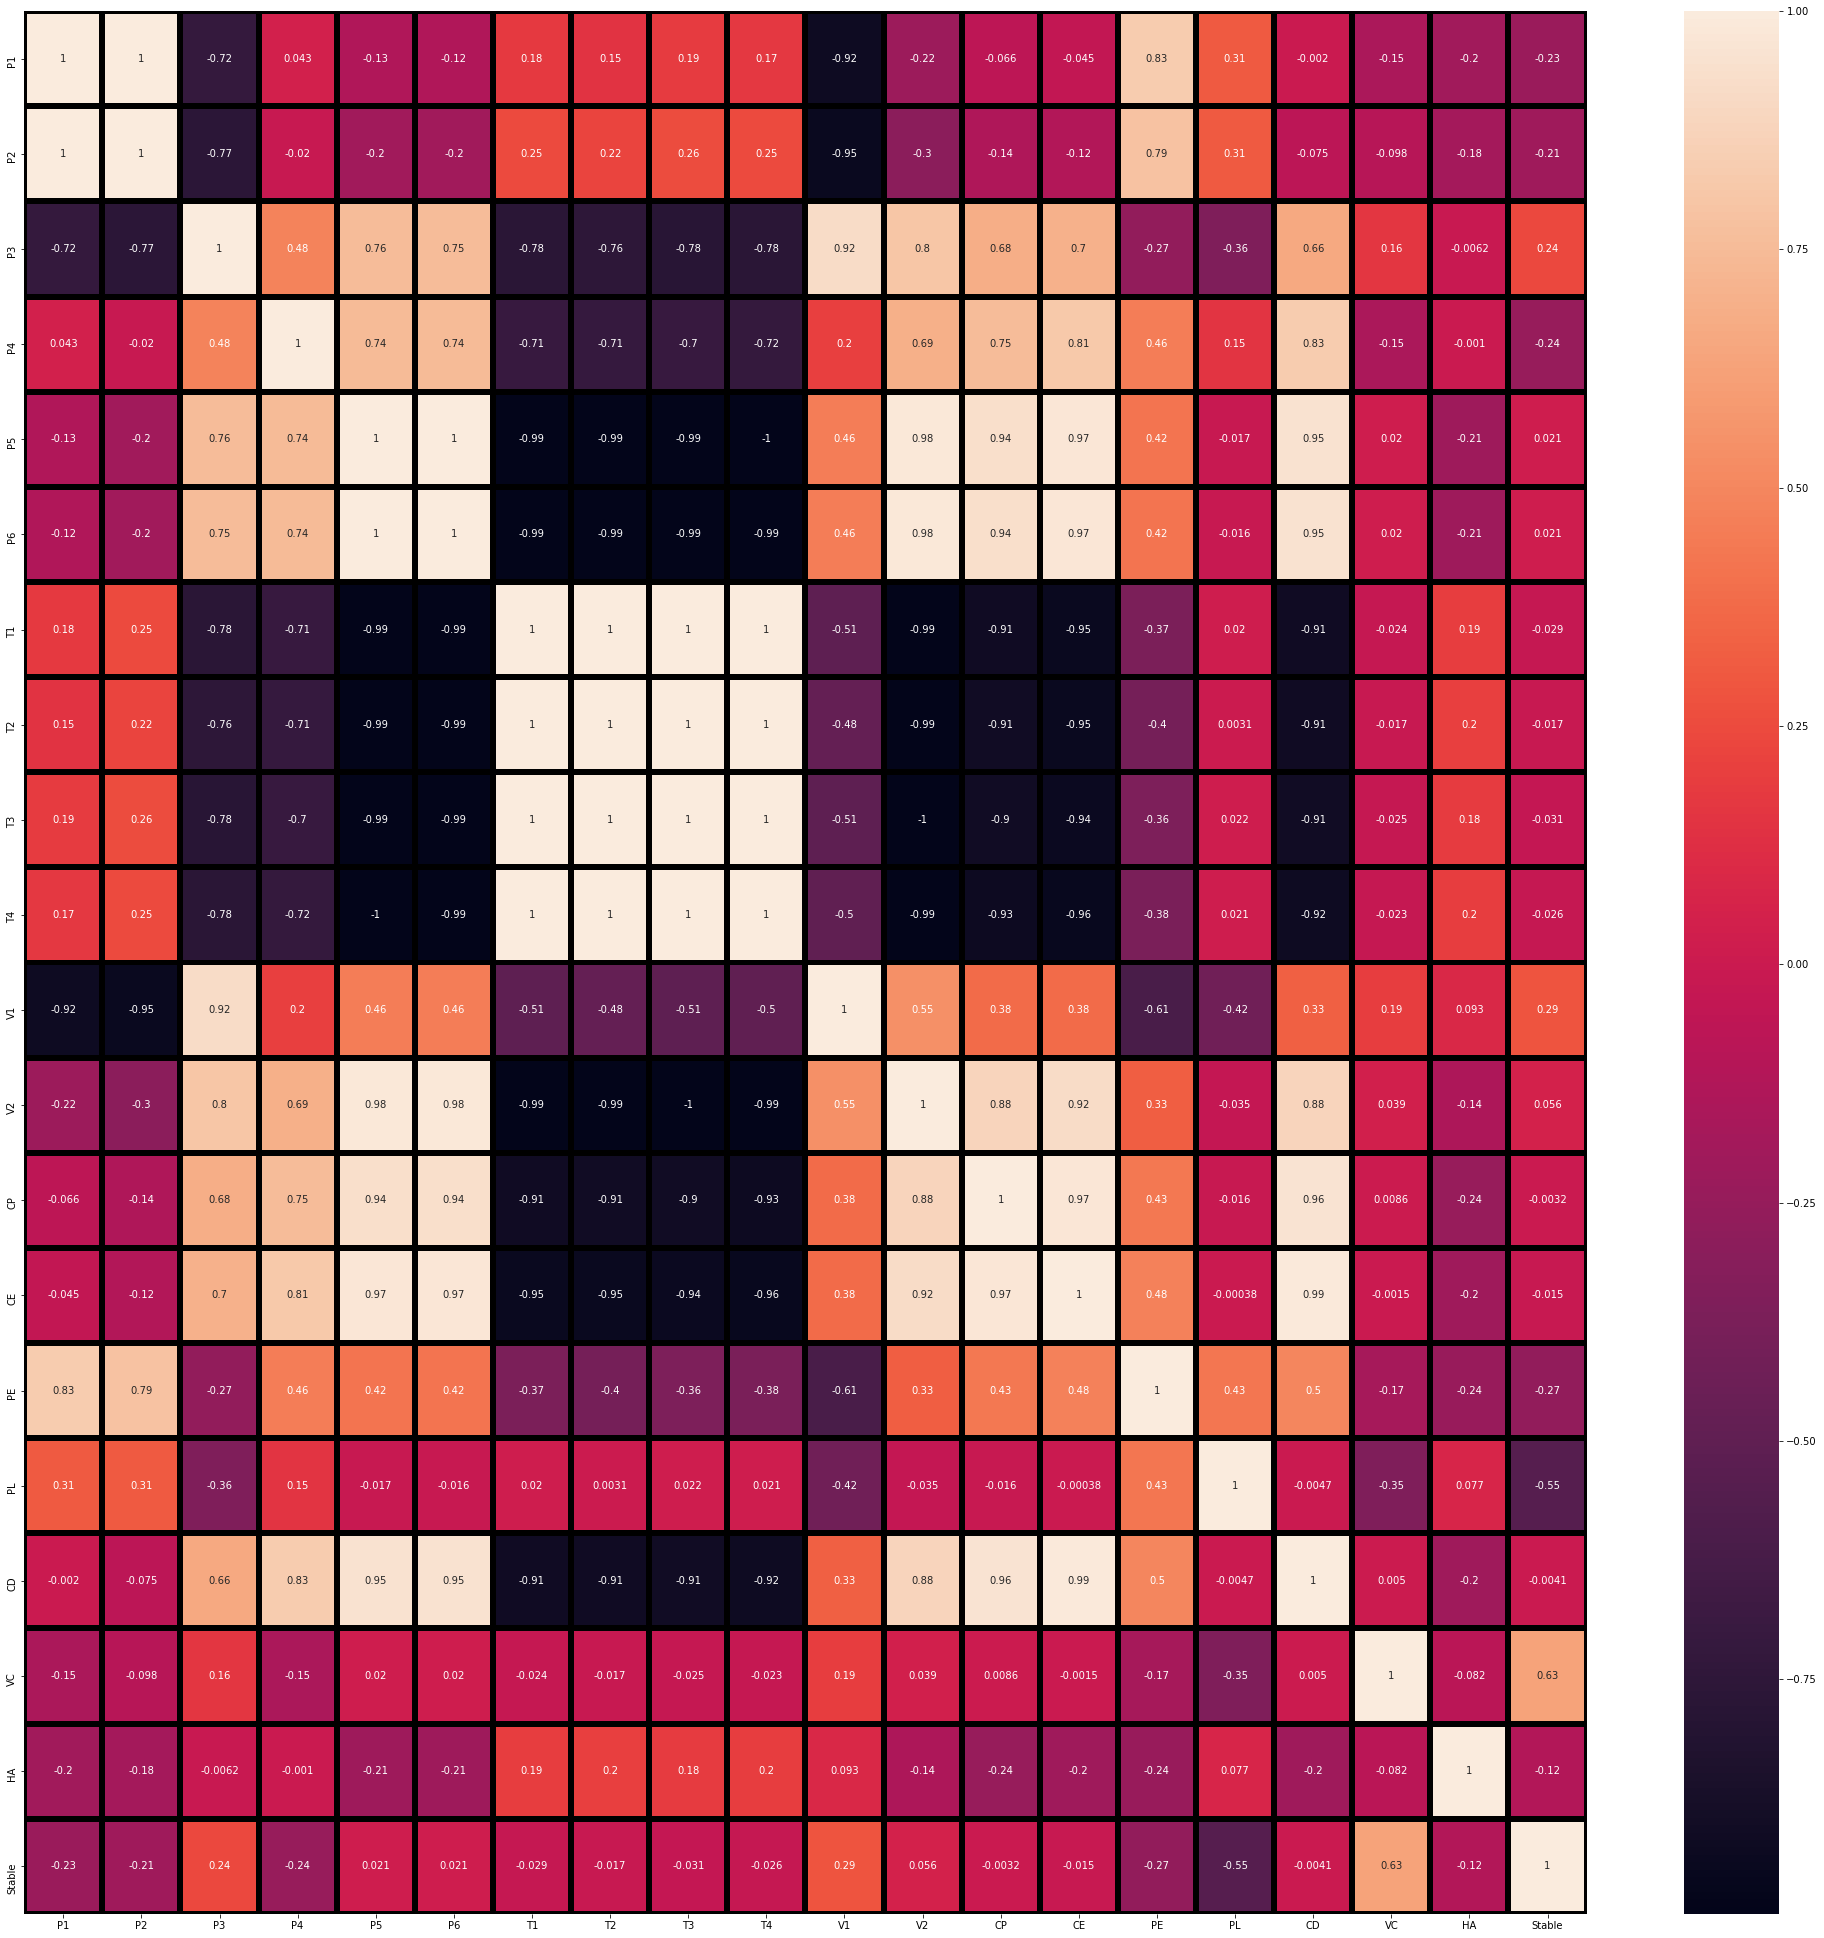

In [21]:
#Lets make a heatmap for our better Understanding.
fig, ax= plt.subplots(figsize=(35,35))
sns.heatmap(Data.corr(), annot=True, linewidths=5, linecolor="black")

In [22]:
#Some features are extremely correlated. Lets remove some features.

In [23]:
#We need to drop all the target variables for our model training.
#Data['PL']=Pump_leak
#Data['CD']=Cooler_Condition
#Data['VC']=Valve_Condition
#Data['HA']=Hydraulic_accumulatorn
#Data['Stable']=Stable_Flag


# Mutual Information Classifier
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. A quantity called mutual information measures the amount of information one can obtain from one random variable given another.



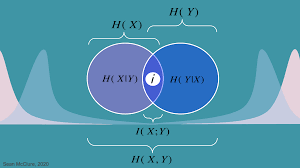

# Selecting best features for Stability

In [24]:
X=Data.drop(['Stable','PL','CD','VC','HA'],1)
y=Data['Stable']

P1    0.279429
P2    0.269172
P3    0.189913
P4    0.093396
P5    0.392179
P6    0.390753
T1    0.407986
T2    0.374049
T3    0.390152
T4    0.391971
V1    0.299717
V2    0.294347
CP    0.123676
CE    0.196252
PE    0.271929
dtype: float64


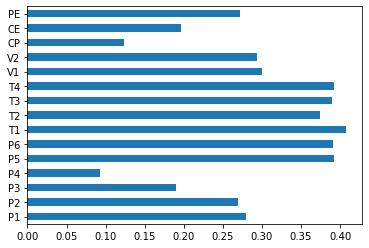

In [25]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances, X.columns[0:len(X.columns)])
print(feat_imp)
feat_imp.plot(kind='barh')
plt.show()

From the graph above, it can be concluded that CP(Cooling Power) and P4(PS4) do not have a substantial contribution towards stability. Hence, they can be removed for evaluation of Stability.

# Selecting best features for Valve Condition.

In [26]:
X=Data.drop(['Stable','PL','CD','VC','HA'],1)
y=Data['VC']

P1    0.580035
P2    0.591373
P3    0.139905
P4    0.088983
P5    0.353833
P6    0.354115
T1    0.436822
T2    0.406241
T3    0.439270
T4    0.377305
V1    0.371591
V2    0.252489
CP    0.062827
CE    0.128845
PE    0.254209
dtype: float64


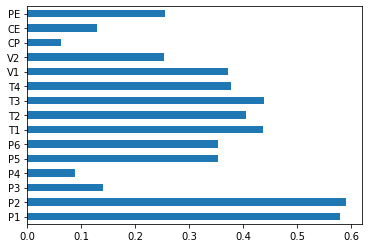

In [27]:
#Feature Selection using Information Gain.
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances, X.columns[0:len(X.columns)])
print(feat_imp)
feat_imp.plot(kind='barh')
plt.show()

From the graph above, it can be concluded that CP(Cooling Power), CE(Cooling Efficiency), P3(PS3), and P4(PS4) do not have a substantial contribution towards stability. Hence, they can be removed for evaluation of valve condition.